<a href="https://colab.research.google.com/github/unnisri/InternPe/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

In [ ]:
match.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.shape

(756, 18)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
delivery.shape

(179078, 21)

In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]


In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
unique_team1 = match_df['team1'].unique()

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
teams = ['Rising Pune Supergiant']
match_df = match_df[match_df['team1'].isin(teams) | match_df['team2'].isin(teams)]
match_df.head()





,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
8,9,IPL-2017,Pune,11-04-2017,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,9,205
12,13,IPL-2017,Rajkot,14-04-2017,Rising Pune Supergiant,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,Saurashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,13,171
16,17,IPL-2017,Bangalore,16-04-2017,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN,17,161


In [ ]:
match_df.shape

(16, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]
print(match_df)

    id    Season       city        date                   team1  \
1    2  IPL-2017       Pune  06-04-2017          Mumbai Indians   
3    4  IPL-2017     Indore  08-04-2017  Rising Pune Supergiant   
8    9  IPL-2017       Pune  11-04-2017          Delhi Capitals   
12  13  IPL-2017     Rajkot  14-04-2017  Rising Pune Supergiant   
16  17  IPL-2017  Bangalore  16-04-2017  Rising Pune Supergiant   
24  25  IPL-2017       Pune  22-04-2017     Sunrisers Hyderabad   
27  28  IPL-2017     Mumbai  24-04-2017  Rising Pune Supergiant   
28  29  IPL-2017       Pune  26-04-2017  Rising Pune Supergiant   
32  33  IPL-2017       Pune  29-04-2017  Rising Pune Supergiant   
37  38  IPL-2017       Pune  01-05-2017           Gujarat Lions   
39  40  IPL-2017    Kolkata  03-05-2017   Kolkata Knight Riders   
42  43  IPL-2017  Hyderabad  06-05-2017  Rising Pune Supergiant   
50  51  IPL-2017      Delhi  12-05-2017          Delhi Capitals   
53  54  IPL-2017       Pune  14-05-2017         Kings XI Punja

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']] # mainly focuses on these columns.

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,2,Pune,Rising Pune Supergiant,184,1,Mumbai Indians,Rising Pune Supergiant,1,1,PA Patel,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1,2,Pune,Rising Pune Supergiant,184,1,Mumbai Indians,Rising Pune Supergiant,1,2,PA Patel,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2,Pune,Rising Pune Supergiant,184,1,Mumbai Indians,Rising Pune Supergiant,1,3,PA Patel,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3,2,Pune,Rising Pune Supergiant,184,1,Mumbai Indians,Rising Pune Supergiant,1,4,JC Buttler,...,0,0,0,0,5,0,5,NaN,NaN,NaN
4,2,Pune,Rising Pune Supergiant,184,1,Mumbai Indians,Rising Pune Supergiant,1,5,PA Patel,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,2,MK Tiwary,...,0,0,0,0,0,0,0,MK Tiwary,caught,KA Pollard
3824,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,3,SPD Smith,...,0,0,0,0,0,0,0,SPD Smith,caught,AT Rayudu
3825,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,4,Washington Sundar,...,1,0,0,0,0,1,1,NaN,NaN,NaN
3826,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,5,DT Christian,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,1,AM Rahane,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,2,MA Agarwal,...,0,0,0,0,4,0,4,NaN,NaN,NaN
127,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,3,MA Agarwal,...,0,0,0,0,0,1,1,NaN,NaN,NaN
128,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,4,MA Agarwal,...,0,0,0,0,1,0,1,NaN,NaN,NaN
129,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,5,AM Rahane,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,2,MK Tiwary,...,0,0,0,0,0,0,0,MK Tiwary,caught,KA Pollard
3824,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,3,SPD Smith,...,0,0,0,0,0,0,0,SPD Smith,caught,AT Rayudu
3825,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,4,Washington Sundar,...,1,0,0,0,0,1,1,NaN,NaN,NaN
3826,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,5,DT Christian,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
print(delivery_df)

      match_id       city                  winner  total_runs_x  inning  \
125          2       Pune  Rising Pune Supergiant           184       2   
126          2       Pune  Rising Pune Supergiant           184       2   
127          2       Pune  Rising Pune Supergiant           184       2   
128          2       Pune  Rising Pune Supergiant           184       2   
129          2       Pune  Rising Pune Supergiant           184       2   
...        ...        ...                     ...           ...     ...   
3823        59  Hyderabad          Mumbai Indians           129       2   
3824        59  Hyderabad          Mumbai Indians           129       2   
3825        59  Hyderabad          Mumbai Indians           129       2   
3826        59  Hyderabad          Mumbai Indians           129       2   
3827        59  Hyderabad          Mumbai Indians           129       2   

                batting_team    bowling_team  over  ball            batsman  \
125   Rising Pune Su

<ipython-input-304-3cd25f876c0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['runs_left']


<ipython-input-305-ca8821c23331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


125     183
126     179
127     178
128     177
129     177
       ... 
3823      6
3824      6
3825      5
3826      3
3827      1
Name: runs_left, Length: 1872, dtype: int64

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
print(delivery_df['balls_left'])

125     119
126     118
127     117
128     116
129     115
       ... 
3823      4
3824      3
3825      2
3826      1
3827      0
Name: balls_left, Length: 1872, dtype: int64


<ipython-input-306-da3f78eab539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,1,AM Rahane,...,0,1,0,1,NaN,NaN,NaN,1,183,119
126,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,2,MA Agarwal,...,0,4,0,4,NaN,NaN,NaN,5,179,118
127,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,3,MA Agarwal,...,0,0,1,1,NaN,NaN,NaN,6,178,117
128,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,4,MA Agarwal,...,0,1,0,1,NaN,NaN,NaN,7,177,116
129,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,5,AM Rahane,...,0,0,0,0,NaN,NaN,NaN,7,177,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,2,MK Tiwary,...,0,0,0,0,MK Tiwary,caught,KA Pollard,123,6,4
3824,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,3,SPD Smith,...,0,0,0,0,SPD Smith,caught,AT Rayudu,123,6,3
3825,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,4,Washington Sundar,...,0,0,1,1,NaN,NaN,NaN,124,5,2
3826,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,5,DT Christian,...,0,2,0,2,NaN,NaN,NaN,126,3,1


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

<ipython-input-308-1cf730e38ae6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
<ipython-input-308-1cf730e38ae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
<ipython-input-308-1cf730e38ae6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,1,AM Rahane,...,1,0,1,0,NaN,NaN,1,183,119,10
126,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,2,MA Agarwal,...,4,0,4,0,NaN,NaN,5,179,118,10
127,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,3,MA Agarwal,...,0,1,1,0,NaN,NaN,6,178,117,10
128,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,4,MA Agarwal,...,1,0,1,0,NaN,NaN,7,177,116,10
129,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,5,AM Rahane,...,0,0,0,0,NaN,NaN,7,177,115,10


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,1,AM Rahane,...,1,0,1,0,NaN,NaN,1,183,119,10
126,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,2,MA Agarwal,...,4,0,4,0,NaN,NaN,5,179,118,10
127,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,3,MA Agarwal,...,0,1,1,0,NaN,NaN,6,178,117,10
128,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,4,MA Agarwal,...,1,0,1,0,NaN,NaN,7,177,116,10
129,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,5,AM Rahane,...,0,0,0,0,NaN,NaN,7,177,115,10


In [ ]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left']/6)
delivery_df['crr']


<ipython-input-310-93e82138a089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left']/6)


125     0.059900
126     0.299003
127     0.358209
128     0.417219
129     0.416529
          ...   
3823    6.184358
3824    6.175732
3825    6.217270
3826    6.308762
3827    6.400000
Name: crr, Length: 1872, dtype: float64

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']
delivery_df['rrr']

<ipython-input-311-121b5019bc97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


125      9.226891
126      9.101695
127      9.128205
128      9.155172
129      9.234783
          ...    
3823     9.000000
3824    12.000000
3825    15.000000
3826    18.000000
3827          inf
Name: rrr, Length: 1872, dtype: float64

In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0


In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

<ipython-input-313-ea301901c09f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Rising Pune Supergiant,Mumbai Indians,Pune,183,119,10,184,0.059900,9.226891,1
126,Rising Pune Supergiant,Mumbai Indians,Pune,179,118,10,184,0.299003,9.101695,1
127,Rising Pune Supergiant,Mumbai Indians,Pune,178,117,10,184,0.358209,9.128205,1
128,Rising Pune Supergiant,Mumbai Indians,Pune,177,116,10,184,0.417219,9.155172,1
129,Rising Pune Supergiant,Mumbai Indians,Pune,177,115,10,184,0.416529,9.234783,1
...,...,...,...,...,...,...,...,...,...,...
3823,Rising Pune Supergiant,Mumbai Indians,Hyderabad,6,4,6,129,6.184358,9.000000,0
3824,Rising Pune Supergiant,Mumbai Indians,Hyderabad,6,3,5,129,6.175732,12.000000,0
3825,Rising Pune Supergiant,Mumbai Indians,Hyderabad,5,2,5,129,6.217270,15.000000,0
3826,Rising Pune Supergiant,Mumbai Indians,Hyderabad,3,1,5,129,6.308762,18.000000,0


In [ ]:
final_df = final_df.sample(final_df.shape[0])
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
897,Gujarat Lions,Rising Pune Supergiant,Rajkot,77,67,10,171,5.182236,6.895522,1
1879,Kolkata Knight Riders,Rising Pune Supergiant,Pune,90,63,9,182,5.041096,8.571429,1
3712,Rising Pune Supergiant,Mumbai Indians,Hyderabad,122,112,10,129,0.414474,6.535714,0
2630,Rising Pune Supergiant,Kolkata Knight Riders,Kolkata,24,35,6,155,6.884672,4.114286,1
2135,Royal Challengers Bangalore,Rising Pune Supergiant,Pune,96,43,4,157,3.243722,13.395349,0
...,...,...,...,...,...,...,...,...,...,...
2906,Sunrisers Hyderabad,Rising Pune Supergiant,Hyderabad,12,1,1,148,6.809458,72.000000,0
3045,Rising Pune Supergiant,Delhi Daredevils,Delhi,149,107,9,168,1.115824,8.355140,0
3293,Rising Pune Supergiant,Kings XI Punjab,Pune,27,82,9,73,2.595611,1.975610,1
1648,Mumbai Indians,Rising Pune Supergiant,Mumbai,72,45,6,160,4.693333,9.600000,0


In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
2158,Royal Challengers Bangalore,Rising Pune Supergiant,Pune,76,21,3,157,4.171674,21.714286,0


In [ ]:
final_df.dropna(inplace=True)
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
897,Gujarat Lions,Rising Pune Supergiant,Rajkot,77,67,10,171,5.182236,6.895522,1
1879,Kolkata Knight Riders,Rising Pune Supergiant,Pune,90,63,9,182,5.041096,8.571429,1
3712,Rising Pune Supergiant,Mumbai Indians,Hyderabad,122,112,10,129,0.414474,6.535714,0
2630,Rising Pune Supergiant,Kolkata Knight Riders,Kolkata,24,35,6,155,6.884672,4.114286,1
2135,Royal Challengers Bangalore,Rising Pune Supergiant,Pune,96,43,4,157,3.243722,13.395349,0
...,...,...,...,...,...,...,...,...,...,...
2906,Sunrisers Hyderabad,Rising Pune Supergiant,Hyderabad,12,1,1,148,6.809458,72.000000,0
3045,Rising Pune Supergiant,Delhi Daredevils,Delhi,149,107,9,168,1.115824,8.355140,0
3293,Rising Pune Supergiant,Kings XI Punjab,Pune,27,82,9,73,2.595611,1.975610,1
1648,Mumbai Indians,Rising Pune Supergiant,Mumbai,72,45,6,160,4.693333,9.600000,0


In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

### Splitting

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
1859,Kolkata Knight Riders,Rising Pune Supergiant,Pune,136,83,9,182,2.599686,9.831325
630,Rising Pune Supergiant,Delhi Daredevils,Pune,190,109,10,205,0.883797,10.458716
682,Rising Pune Supergiant,Delhi Daredevils,Pune,136,59,5,205,3.757943,13.830508
1122,Royal Challengers Bangalore,Rising Pune Supergiant,Bangalore,112,79,8,161,2.751950,8.506329
490,Kings XI Punjab,Rising Pune Supergiant,Indore,2,8,6,163,8.140449,1.500000
...,...,...,...,...,...,...,...,...,...
3753,Rising Pune Supergiant,Mumbai Indians,Hyderabad,82,73,9,129,2.615147,6.739726
3469,Mumbai Indians,Rising Pune Supergiant,Mumbai,144,103,10,162,1.050243,8.388350
1923,Kolkata Knight Riders,Rising Pune Supergiant,Pune,6,22,9,182,9.077364,1.636364
1665,Mumbai Indians,Rising Pune Supergiant,Mumbai,40,28,6,160,6.242775,8.571429


In [ ]:
y_train

1859    1
630     0
682     0
1122    0
490     1
       ..
3753    0
3469    0
1923    1
1665    0
2177    0
Name: result, Length: 1491, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city'])])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9973190348525469

In [ ]:
pipe.predict_proba(X_test)[9]

array([0.03988597, 0.96011403])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
delivery_df.apply(match_summary,axis=1)

Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bowling Team-Mumbai Indians | Target- 184
Batting Team-Rising Pune Supergiant | Bo

125     None
126     None
127     None
128     None
129     None
        ... 
3823    None
3824    None
3825    None
3826    None
3827    None
Length: 1872, dtype: object

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id &  (x_df['ball'] == 6)]
    if match.empty:
       print(f"No data found for match_id {match_id} with ball 6.")
       return None, None
    columns_to_select = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']
    missing_columns = [col for col in columns_to_select if col not in match.columns]
    if missing_columns:
        print(f"Missing columns in the DataFrame: {missing_columns}")
        return None, None
    temp_df = match[columns_to_select].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    if temp_df.empty:
        print(f"No data available after filtering for 'balls_left' != 0.")
        return None, None
    try:
        result = pipe.predict_proba(temp_df)
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None
    if result.shape[1] < 2:
        print("Prediction result does not have the expected number of classes.")
        return None, None
    temp_df['lose'] = np.round(result[:, 0] * 100, 1)
    temp_df['win'] = np.round(result[:, 1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[:temp_df.shape[0]]

    print("Target-", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target




In [ ]:
temp_df,target = match_progression(delivery_df,60,pipe)


No data found for match_id 60 with ball 6.


In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,1,AM Rahane,...,0,NaN,NaN,1,183,119,10,0.059900,9.226891,1
126,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,2,MA Agarwal,...,0,NaN,NaN,5,179,118,10,0.299003,9.101695,1
127,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,3,MA Agarwal,...,0,NaN,NaN,6,178,117,10,0.358209,9.128205,1
128,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,4,MA Agarwal,...,0,NaN,NaN,7,177,116,10,0.417219,9.155172,1
129,2,Pune,Rising Pune Supergiant,184,2,Rising Pune Supergiant,Mumbai Indians,1,5,AM Rahane,...,0,NaN,NaN,7,177,115,10,0.416529,9.234783,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,2,MK Tiwary,...,1,caught,KA Pollard,123,6,4,6,6.184358,9.000000,0
3824,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,3,SPD Smith,...,1,caught,AT Rayudu,123,6,3,5,6.175732,12.000000,0
3825,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,4,Washington Sundar,...,0,NaN,NaN,124,5,2,5,6.217270,15.000000,0
3826,59,Hyderabad,Mumbai Indians,129,2,Rising Pune Supergiant,Mumbai Indians,20,5,DT Christian,...,0,NaN,NaN,126,3,1,5,6.308762,18.000000,0


<ipython-input-333-9bd2648706b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['end_of_over'] = delivery_df['over']
<ipython-input-333-9bd2648706b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['wickets_in_over'] = delivery_df['wickets']
<ipython-input-333-9bd2648706b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Text(0.5, 1.0, 'Target-100')

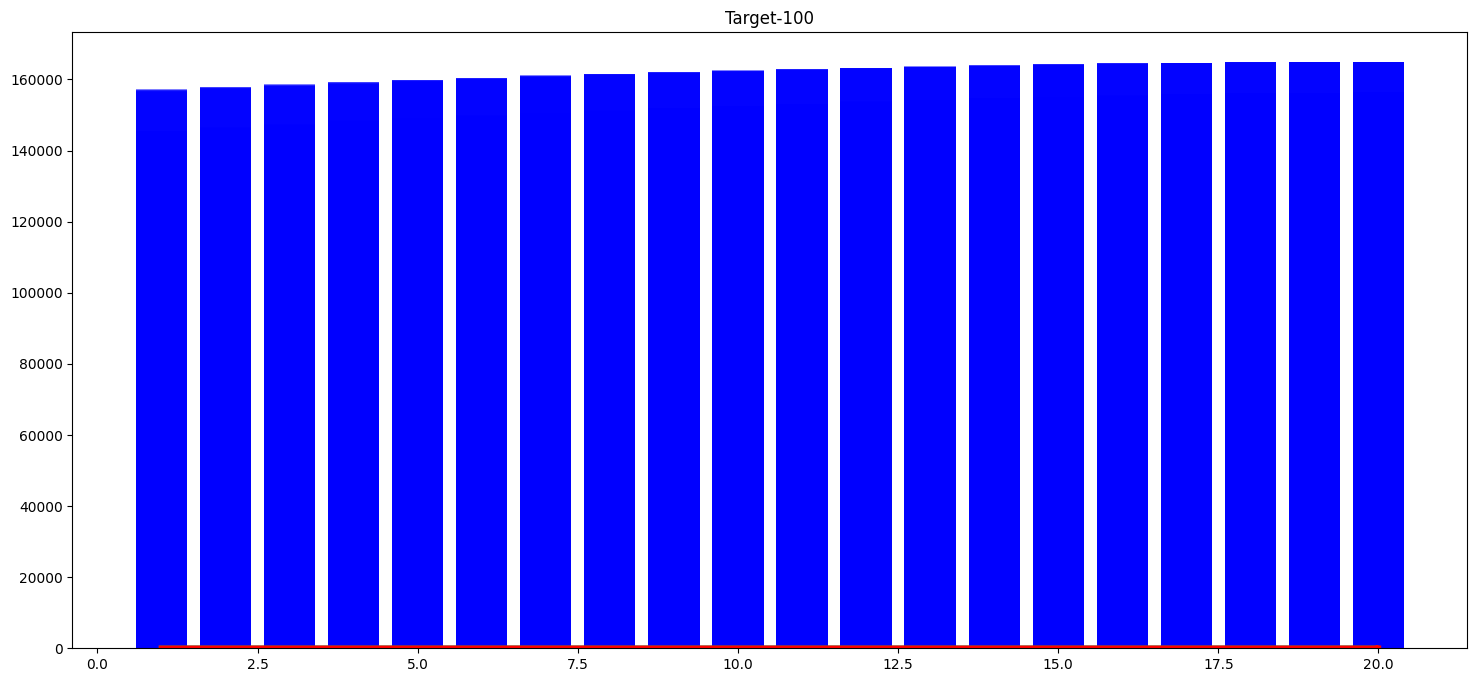

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))

delivery_df['end_of_over'] = delivery_df['over']
delivery_df['wickets_in_over'] = delivery_df['wickets']
delivery_df['win'] = delivery_df['total_runs_x'] / delivery_df['total_runs_x'].max() # Example: win probability based on runs
delivery_df['lose'] = 1 - delivery_df['win']
delivery_df['runs_after_over'] = delivery_df['runs_left'].cumsum()


temp_df = delivery_df.copy()
target = 100

plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4,label='Win Probability')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4,label='Lose Probability')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'], color='blue', alpha=0.5, label='Runs After Over')
plt.title('Target-' + str(target))


In [ ]:
teams   # winning team

['Rising Pune Supergiant']

In [ ]:
delivery_df['city'].unique()

array(['Pune', 'Indore', 'Rajkot', 'Bangalore', 'Mumbai', 'Kolkata',
       'Hyderabad', 'Delhi'], dtype=object)